In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("customersatisfaction.csv")

In [3]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.tail()

,Customer Satisfaction,Incentive
95,2.055072,8.686851
96,0.864149,2.901486
97,-1.586101,0.786207
98,1.558528,5.447475
99,0.512504,4.356168


In [6]:
df.describe()

,Customer Satisfaction,Incentive
count,100.000000,100.000000
mean,-0.005427,3.445220
std,1.721792,2.911818
min,-2.992863,-1.068081
25%,-1.431357,1.471341
50%,0.109167,2.748839
75%,1.421119,4.739113
max,2.986736,11.000056


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
df.isnull().sum()

Customer Satisfaction    0
Incentive                0
dtype: int64

In [9]:
df.columns

Index(['Customer Satisfaction', 'Incentive'], dtype='object')

In [10]:
df.corr(numeric_only=True)

,Customer Satisfaction,Incentive
Customer Satisfaction,1.000000,0.813932
Incentive,0.813932,1.000000


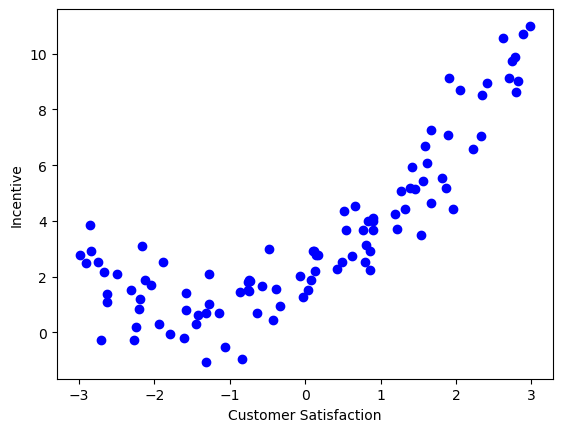

In [11]:
plt.scatter(df["Customer Satisfaction"], df["Incentive"], color="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")

plt.show()

In [12]:
# dependent & independent features

In [13]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [14]:
# train - test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [16]:
X_train

,Customer Satisfaction
99,0.512504
3,2.625838
20,-0.865714
55,-1.145369
6,2.823460
...,...
28,1.191020
0,-1.282447
5,-1.311432
12,0.490521


In [17]:
# scaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
regression = LinearRegression()

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# prediction

In [23]:
y_pred = regression.predict(X_test)

In [24]:
## Performance Metrics

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  2.717137277518106
mae:  1.4224335966213624
rmse:  1.6483741315363165


In [25]:
# r2 score

score = r2_score(y_test, y_pred)
print('r2 score: ', score)

r2 score:  0.2705652535622246


In [26]:
#adjusted R-squared
adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('adjusted r2: ', adjusted_r2)

adjusted r2:  0.2300411009823482


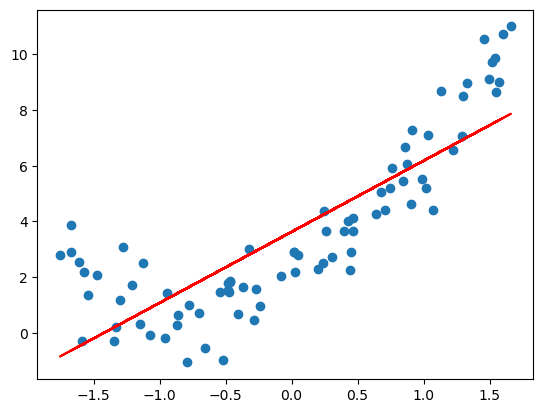

In [27]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = "r")
plt.show()

sonuç olarak lineer regresyon çalışmadı çünkü polinom denklem mevcut

In [28]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [30]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [31]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [32]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.7685687698788557


In [33]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [34]:
regression.intercept_

2.076676429793282

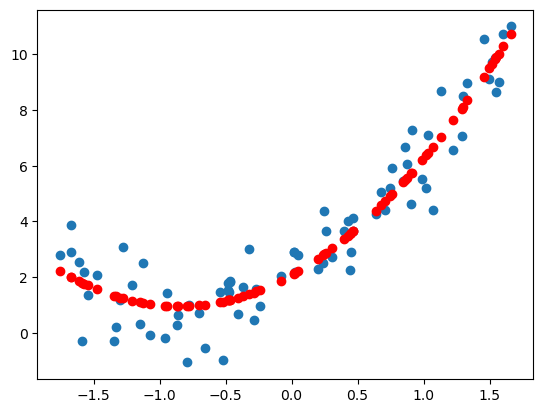

In [35]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

In [36]:
# new data

In [37]:
new_df = pd.read_csv("newdatas.csv")

In [38]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [39]:
new_df.rename(columns = {"0": "Customer Satisfaction"}, inplace=True)

In [40]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [41]:
X_new = new_df[["Customer Satisfaction"]]

In [42]:
X_new = scaler.transform(X_new)

In [43]:
X_new_poly = poly.transform(X_new)

In [44]:
y_new = regression.predict(X_new_poly)

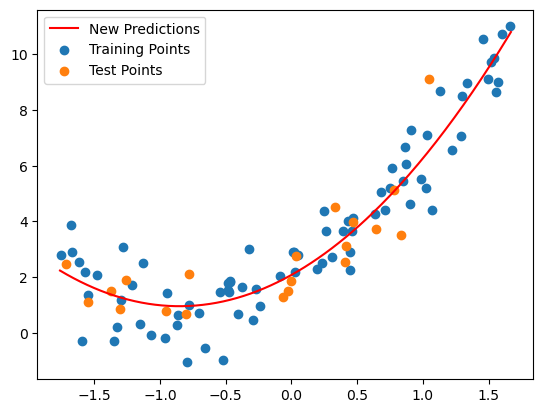

In [45]:
plt.plot(X_new, y_new, "r", label="New Predictions")
plt.scatter(X_train, y_train, label="Training Points")
plt.scatter(X_test, y_test, label="Test Points")
plt.legend()
plt.show()

# Pipeline

In [ ]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standard_scaler", scaler),
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 score: ", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label="New Predictions")
    plt.scatter(X_train, y_train, label="Training Points")
    plt.scatter(X_test, y_test, label="Test Points")
    plt.legend()
    plt.show()